### ***Theory of GAs***

The first appearance of genetic algorithms (GAs) was on J. D. Bagley's thesis *"The behavior of adaptive systems which employ genetic and correlative algorithm"*. He described them like this: *"[...] genetic algorithms are simulations of evolution, of what kind ever. In most cases, however, genetic algorithms are nothing else than probabilistic optimization methods which are based on the principles of evolutions"*.

In general, the problem GAs are used to solve is to find $x_\in X$ such that an arbitrary $f:X \longrightarrow \mathbb{R}$ is maximal, i.e. $f(x_0)=\max_{x\in X}f(x)$. Depending on the actual problem, it can be quite difficult to obtain such point and it might be sufficient to have a local maximum or to be as close as possible to the global maximum. The function $f$ is called *"fitness"* because it assigns values to individuals $x\in X$ so that we can compare them. Reproduction and adaption are carried out at genetic information level, so GAs do not operate on the values of the search space $X$, but on some coded versions of them (like strings or arrays). 

Assume $S$ to be a set of strings (or arrays) in general with underlining grammar and let $X$ be the search space of the above optimization problem, then the function $c: X \longrightarrow S$ is called a *coding function*; conversely $c^{-1}: S \rightarrow X$ is called a *decoding function*.
In practice, coding and decoding function have to be specified according to the needs of the actual problem.

The transition from one generation to the next consists of four basic components:
1. ***selection***: choose the individuals to be reproduced according to their fitness values.
2. ***crossover***: merge the genetic information of two individuals (i.e. their chromosomes); if implemented correctly, good parents produce good children.
3. ***mutation***: in GA, mutation is realized as a random deformation of the chromosomes arrays with a certain probability. The positive effects are the preservation of genetic diversity and avoiding of local maxima.
4. ***sampling***: it's the procedure that computes a new generation from the previous one and its offsprings.

Note: normal genetic algorithms do not use any auxiliary information about the objective function such as its gradient, so they can be applied to any kind of continuous or discrete optimization problem. Moreover, since they work on the whole population and not on a single point at time (like GD), they are more robust and have more chance to find the global optimum.

---

Note: the paper doesn't describe in depth all the parts of the algorithm and the design choices made; we have made them using what we learnt, maybe other choices could be more effective.

The starting dataset is made of $F$ features, so $X$ will be the *power set* of $F$: $$X=\mathcal{P}(F)=\{A\,|\,A\subseteq F\}$$
Chromosomes are represented as arrays of length $|F|$ ($b = \{0, 1\}^{|F|}$) where $i\text{-th}$ gene represents wether feature $f_i$ is considered by the individual. Coding and decoding functions come naturally:
$$
c(A) = (b_1, b_2, \dots, b_{|F|}), \quad \text{where } b_i =
\begin{cases}
1, & \text{if } f_i \in A, \\
0, & \text{otherwise.}
\end{cases}
$$

$$
c^{-1}(b) = \{ f_i \in F \mid b_i = 1 \}
$$

Authors suggested to take as fitness function the accuracy $\phi$.  

At each timestamp $t$, we'll consider a fixed size population with $m$ individuals:
$$\mathcal{B}_t=(b_{1, t}, b_{2, t}, \dots, b_{m, t})$$

The algorithm developed in this notebook is the following:
$$
\begin{aligned}
& \textbf{GA}(\phi_m : \text{min fitness to reach}\\
&\quad \quad      m: \text{population size},\\
&\quad\quad      F: \text{initial set of features}, \\
&\quad\quad      k: \text{total number of iterations},\\
&\quad\quad      p_m : \text{probability of mutation},\\
&\quad\quad      p_c : \text{probability of crossover},\\
&\quad\quad      n: \text{number of crossover points},\\
&\quad\quad      X_{train}: \text{matrix with training samples}, \\
&\quad\quad      y_{train}: \text{vector with training labels}, \\
&\quad\quad      X_{test}: \text{matrix with testing samples}, \\
&\quad\quad      y_{test}: \text{vector with testing labels}
):\\
\\
& \quad t := 0 \\
& \quad \text{compute initial population  } \mathcal{B}_0 = (b_{1,0}, \dots, b_{m,0}) \\
& \quad \text{compute fitness for each individual } b_{i, 0}\\
& \quad \text{compute maximum fitness } \phi_0 \text{ for } \mathcal{B}_0\\
\\
& \quad \textbf{while  } \phi_t < \phi_m \textbf{ and } t < k: \\
& \quad \quad   \textbf{for  }i := 0 \textbf{ to } m - 1: \\
& \quad \quad  \quad     \text{select an individual  } b_{i,t+1} \text{ from  } \mathcal{B}_t \\
& \quad \quad   \textbf{for  } i := 0 \textbf{ to } m-2 \textbf{ step } 2: \\
& \quad \quad  \quad     \textbf{if } \text{Random}[0,1] \leq p_c: \\
& \quad \quad  \quad \quad         \text{cross } b_{i,t+1} \text{ with } b_{i+1,t+1} \\
& \quad \quad   \textbf{for  } i := 0 \textbf{ to } m -1: \\
& \quad \quad  \quad     \text{eventually mutate } b_{i,t+1} \\
& \quad \quad t := t + 1 \\
& \quad \quad \text{compute fitness for each individual } b_{i, t}\\
& \quad \quad \text{compute maximum fitness } \phi_t \text{ for } \mathcal{B}_t\\
&\\
& \quad \textbf{return } b_{i, t} \text{ with maximum } \phi \text{ and its fitness}
\end{aligned}
$$

where the sampling policy is: replace selected individuals with one of its children and all the others die immediately. The genetic operations are:
1. ***selection***: it can be deterministic, but in most implementations it has random components. The one used in this notebook is *"roulette wheel"* (or *"proportional selection"*) where the probability to choose a certain individual is proportional to its fitness:
$$P\{b_{i, t} \text{ is selected}\} = \frac{\phi(b_{i, t})}{\sum_{k = 1}^m\phi(b_{k, t})}$$

It's called *"roulette"* because it resembles a roulette game where the slots aren't equally wide.

2. ***crossover***: it's the exchange of genes between chromosomes of the two parents. We can realize it using different techniques:
    * *single point*: the two vectors are cut at a randomly chosen position and the two tails are swapped.
    * *multiple points crossover*: instead of only one, $n$ breaking points are randomly chosen; then, every second section is swapped.
    $$
    \begin{aligned}
    &\textbf{crossover}(p_1:\text{first parent},\\
    &\quad\quad\quad\quad\quad p_2: \text{second parent}, \\
    &\quad\quad\quad\quad\quad n: \text{number of crossover points}):\\
    &\text{create two empty arrays $c_1$, $c_2$ for the children}\\
    &\text{generate $n$ distinct positions ($P$) in range $[0, m-1]$ and sort them}\\
    &\text{swap} := \text{false}\\
    &\text{start} := 0\\
    &\\
    &\textbf{for  } c \in P \cup [n]:\\
    &\quad \textbf{if } \text{swap}:\\
    &\quad\quad c_1[\text{start} : k] = p_2[\text{start} : k]\\
    &\quad\quad c_2[\text{start} : k] = p_1[\text{start} : k] \\  
    &\quad\textbf{else:}\\
    &\quad\quad c_1[\text{start} : k] = p_1[\text{start} : k]\\
    &\quad\quad c_2[\text{start} : k] = p_2[\text{start} : k]  \\
    &\quad\text{swap} := \textbf{not } \text{swap}    \\
    &\quad\text{start} := c\\
    &\\
    &\textbf{return } c_1, c_2
    \end{aligned}
    $$

3. ***mutation***: in reality, the probability that a certain gene is mutated is almost equal for all genes, so for the $i\text{-th}$ gene if $\text{random}[0, 1] \leq p_m$ we invert it.

### ***GA algorithm definition***

In [1]:
import numpy as np

import sys
sys.path.append("..")
from utils.models.RandomForest import *
from utils.models.DecisionTree import *
from utils.models.NaiveBayes import *

from concurrent.futures import ThreadPoolExecutor

from utils.model_evaluation import accuracy

In [2]:
class GeneticAlgorithm:
    def __init__(self, min_fit, pop_size, features, max_iters, mut_prob, crs_prob, num_crs_points, model, fit_funct = lambda x, y: accuracy(x, y)):
        """
            Initializes the GA object.

            Args:
                min_fit (float): target fitness threshold.
                pop_size (int): population size.
                features (list): feature set.
                max_iters (int): maximum generations.
                mut_prob (float): mutation probability.
                crs_prob (float): crossover probability.
                num_crs_points (int): number of crossover points.
                model (tuple): the BaseModel to be instantiated to create the individuals of the population along with a dict containing its parameters.
                fit_funct (lambda): the function to be used as fitness with arguments (y_pred, y_true) in this order.
        """

        self.min_fit = min_fit
        self.pop_size = pop_size
        self.features = features
        self.max_iters = max_iters
        self.mut_prob = mut_prob
        self.crs_prob = crs_prob
        self.num_crs_points = num_crs_points
        
        #This three attributes provide a lot of flexibility to our code: we can test the GA not only on the RF with accuracy as fitness (as in the paper)
        #but also on all the other algorithms we have developed by only instantiating another objet
        self.model = model[0]
        self.model_params = model[1]

        self.fit_funct = fit_funct

    def fitness(self, X_train, y_train, X_test, y_test):
        """
            Computes the fitness of a model by training and testing it on the selected features of the dataset.
            The used metric is the accuracy.

            Args:
                X_train, X_test (np.ndarray): the feature matrix for training and testing.
                y_train, y_test (np.ndarray): the target variable for training and testing.

            Returns:
                fitness: the accuracy value.
        """

        #See the notebook of the model you have passed for a comparison and detailed explanation of how this code works.
        #Note: in some cases (like RF) a tradeoff between performance and model capabilities has to be chosen: this might impact on the computed features vector!
        inst = self.model(**self.model_params)
        
        inst.fit(X_train, y_train)

        y_pred, _ = inst.predict(X_test)

        return self.fit_funct(y_pred, y_test)

    def crossover(self, p1, p2, n):
        """
            This method computes the n-crossover between two parents by following the algorithm described in theory part.

            Args:
                p1 (np.ndarray): the chromosome of the first parent.
                p2 (np.ndarray): the chromosome of te second parent.
                n (int): number of split points.
            
            Returns:
                c1 (np.ndarray): the first children.
                c2 (np.ndarray): the second children.
        """

        c1 = np.empty(p1.shape)
        c2 = np.empty(p2.shape)
        crs_pts = np.empty(n, dtype = int)

        #Available positions are only the ones from 1 to len(p1) -1
        av_pos = np.array(range(1, len(p1) - 1)) 

        #crs_pts first index
        crs_pts[0] = np.random.choice(range(1, len(p1) - 1))

        for i in range(n - 1):
            #Update available positions by deleting the neighbor positions of the last extracted index: what we want to avoid is a
            #situation like [2, 3] that means that no crossover of genes in 2 - 3 will be made.
            av_pos = np.setdiff1d(av_pos, np.array(range(crs_pts[i] - 2, crs_pts[i] + 3)))

            #Generate another index
            crs_pts[i + 1] = np.random.choice(av_pos)

        crs_pts = np.sort(crs_pts)
        
        #We need to append to crs_points the last index of the array, otherwise we wouldn't swap the last genes of the chromosomes!
        crs_pts = np.append(crs_pts, len(p1))

        swap = False
        start = 0

        for c in crs_pts:
            if swap:
                c1[start : c], c2[start : c] = p2[start : c], p1[start : c]
            else:
                c1[start : c], c2[start : c] = p1[start : c], p2[start : c]

            #If one chuck of genes has been swapped, the next should not be swapped and vice versa
            swap = not swap

            #The new start of the chuck becomes the endpoint of the previous
            start = c

        return c1, c2

    def spawn_threads_fitness(self, B, X_train, y_train, X_test, y_test):
        """
            Each individual can be trained by a different thread to increase performance. 
            This methods creates a thread pool and assigns a features vector to a spawned thread.

            Args:
                B (np.ndarray) : the array containing the selected features.
                X_train, X_test (np.ndarray): the feature matrix for training and testing.
                y_train, y_test (np.ndarray): the target variable for training and testing.
            
            Returns:
                fits: the list of fitness scores.
        """

        #Create a thread pool with at most 20 threads (typically max_workers = min(20, num_cores_of_machine))
        with ThreadPoolExecutor(max_workers = 20) as executor:
            #To vectorize the function fitness, we need to create a list of tuples, each containing the attributes to be passed to the method
            args = [(X_train[:, b.astype(bool)], y_train, X_test[:, b.astype(bool)], y_test) for b in B]
            
            #Then, we use the executor to compute the fitness scores
            fits = list(executor.map(lambda p: self.fitness(*p), args)) 
        
        return np.array(list(fits))

    def run(self, X_train, y_train, X_test, y_test):
        """
            Genetic algorithm for feature selection.

            Args:
                model (BaseModel): the model to be instantiated to create the individuals of the population.

            
            Returns:
                features (np.ndarray): the selected features.
                max_fit (float): the fitness value of the solution.
                feats_history (list): the history of the feature vectors with highest fitness.
                fits_history (list): the history of fitness values.
        """

        np.random.seed(0)
        t = 0

        #Compute the initial population
        B = np.random.choice([0, 1], size = (self.pop_size, len(self.features)), p = [0.4, 0.6])

        #Compute the fitness of each individual in the initial population and the maximum fit reached
        fits = self.spawn_threads_fitness(B, X_train, y_train, X_test, y_test)
        max_fit, max_fit_id = np.max(fits), np.argmax(fits)

        feats_history = [B[max_fit_id, :]]
        fitness_history = [max_fit]

        while max_fit < self.min_fit and t < self.max_iters:
            if t % 5 == 0:
                print(f"Current generation: {t}")
            
            #Start with selection
            #Define the "roulette wheel" probabilities (note: in this case all fitness measures are positive)
            roulette_probs = fits / np.sum(fits)

            #Choose randomly m individuals: by how selection probabilities are defined, individuals with higher fitness should be selected more frequently
            ids = np.random.choice(range(self.pop_size), size = self.pop_size, replace = True, p = roulette_probs)

            #Update the population with the selected individuals
            B = B[ids, :]

            #Then, apply crossover
            for i in range(0, self.pop_size - 1):
                #Crossover has to be applied only with p_c probability
                if np.random.rand() < self.crs_prob:
                    B[i], B[i + 1] = self.crossover(B[i], B[i + 1], self.num_crs_points)

            #Finally, apply mutation
            for i in range(self.pop_size):
                mut_probs = np.random.rand(len(self.features))

                #Mutation has to be applied only when the probability on the single gene is < p_m.
                #As defined in theory, it inverts the bit
                B[i, mut_probs < self.mut_prob] = 1 - B[i, mut_probs < self.mut_prob]

            #At the end, compute again the fitness of each individual in the population and the maximum fit reached
            fits = self.spawn_threads_fitness(B, X_train, y_train, X_test, y_test)
            c_max_fit, c_max_fit_id = np.max(fits), np.argmax(fits)

            feats_history.append(B[c_max_fit_id, :])
            fitness_history.append(c_max_fit)

            t = t + 1

        max_fit_id = np.argmax(np.array(fitness_history))
        max_fit = np.max(np.array(fitness_history))

        return feats_history[max_fit_id], max_fit, feats_history, fitness_history
    
    def decode(self, c):
        """
            Utility method to decode a chromosome into a list of strings corresponding to the features of the dataset.

            Args:
                c (np.ndarray): the chromosome to be decoded.
            
            Returns:
                str_version (list): the decoded chromosome in form of a list of strings.
        """

        str_version = []

        for i in range(len(c)):
            if c[i] == 1:
                str_version.append(f"V{i}")
        
        for i in range(len(str_version)):
            if str_version[i] == "V0":
                str_version[i] = "Time"
            
            if str_version[i] == "V29":
                str_version[i] = "Amount"

        return str_version
    
    def encode(self, str_version):
        """
            Utility method to encode a list of strings corresponding to the features of the dataset into a chromosome.

            Args:
                str_version (list): the list of strings to be encoded.

            Returns:
                c (np.ndarray): the resulting chromosome.
        """

        c = np.zeros(len(self.features), dtype = int)

        for i in range(len(str_version)):
            if str_version[i] != "Amount" and str_version[i] != "Time":
                c[int(str_version[i][1:])] = 1
                
        for i in range(len(str_version)):
            if str_version[i] == "Time":
                c[0] = 1
            
            if str_version[i] == "Amount":
                c[-1] = 1

        return c

### ***Usage of the GA***

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

import sys
sys.path.append("..")

from utils.preprocessing import undersample

from utils.model_evaluation import accuracy, recall, precision, f1_score

In [4]:
#Load the dataset
data = pd.read_csv("../creditcard_2021.csv")

#"Class" column is the target variable, so we remove it from the feature matrix and store it in the variable y
X = data.drop(columns = ["Class"])
y = data["Class"]

X = np.array(X)
y = np.array(y)

In [5]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#X_train, y_train = undersample(X_train, y_train, 0, 1 - (sum(y_train) * 300.0 / X_train.shape[0]))

In [6]:
params = {
    "classes" : np.unique(y_train)
}

ga = GeneticAlgorithm(1.0, 90, range(X.shape[1]), 50, 0.05, 0.7, 2, (GaussianNaiveBayes, params), lambda x, y: accuracy(x, y))

In [7]:
X_train_nb_1, y_train_nb_1 = X_train, y_train

best_feats_nb_1, max_fit_nb_1, feats_hist_nb_1, fit_hist_nb_1 = ga.run(X_train_nb_1, y_train_nb_1, X_test, y_test)
print(f"Best feature vector: {ga.decode(best_feats_nb_1)}, with fitness {max_fit_nb_1}")

Current generation: 0
Current generation: 5
Current generation: 10
Current generation: 15
Current generation: 20
Current generation: 25
Current generation: 30
Current generation: 35
Current generation: 40
Current generation: 45
Best feature vector: ['Time', 'V4', 'V9', 'V11', 'V16', 'V17', 'V18', 'V24', 'V26', 'V27'], with fitness 0.9988413328183702


In [8]:
params = {
    "classes" : np.unique(y_train)
}

#We can combine accuracy, precision, (...) in the fitness function to make a tradeoff between them
ga = GeneticAlgorithm(3.0, 90, range(X.shape[1]), 50, 0.05, 0.7, 2, (GaussianNaiveBayes, params), lambda x, y: 2.0 * accuracy(x, y) + precision(x, y))

In [9]:
X_train_nb_2, y_train_nb_2 = X_train, y_train

best_feats_nb_2, max_fit_nb_2, feats_hist_nb_2, fit_hist_nb_2 = ga.run(X_train_nb_2, y_train_nb_2, X_test, y_test)
print(f"Best feature vector: {ga.decode(best_feats_nb_2)}, with fitness {max_fit_nb_2}")

Current generation: 0
Current generation: 5
Current generation: 10
Current generation: 15
Current generation: 20
Current generation: 25
Current generation: 30
Current generation: 35
Current generation: 40
Current generation: 45
Best feature vector: ['V4', 'V5', 'V6', 'V10', 'V14', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V26', 'V28', 'Amount'], with fitness 2.8356928249337723


In [10]:
params = {
    "n_trees" : 20,
    "criterion" : "gini", 
    "max_depth" : 10, 
    "min_samples_split" : 2, 
    "min_samples_leaf" : 1, 
    "min_impurity_decrease" : 0, 
    "max_thresholds" : 20, 
    "random_state" : 0
}

ga = GeneticAlgorithm(1.0, 90, range(X.shape[1]), 15, 0.05, 0.7, 2, (RandomForest, params), lambda x, y: accuracy(x, y))

In [11]:
X_train_rf, y_train_rf = undersample(X_train, y_train, 0, 1 - (sum(y_train) * 300.0 / X_train.shape[0]))

best_feats_rf, max_fit_rf, feats_hist_rf, fit_hist_rf = ga.run(X_train, y_train, X_test, y_test)
print(f"Best feature vector: {ga.decode(best_feats_rf)}, with fitness {max_fit_rf}")

Current generation: 0
Current generation: 5
Current generation: 10
Best feature vector: ['Time', 'V2', 'V4', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V21', 'V24', 'V25', 'Amount'], with fitness 0.9995786664794073


In [19]:
params = {
    "criterion" : "giny", 
    "max_depth" : 10, 
    "min_samples_split" : 50, 
    "min_samples_leaf" : 25, 
    "min_impurity_decrease" : 1e-5, 
    "max_thresholds" : 20, 
    "max_features" : None,
    "random_state" : 0
}

ga = GeneticAlgorithm(1.0, 90, range(X.shape[1]), 15, 0.05, 0.7, 2, (DecisionTree, params), lambda x, y: f1_score(x, y))

In [20]:
X_train_dt, y_train_dt = undersample(X_train, y_train, 0, 0.5)

best_feats_dt, max_fit_dt, feats_hist_dt, fit_hist_dt = ga.run(X_train_dt, y_train_dt, X_test, y_test)
print(f"Best feature vector: {ga.decode(best_feats_dt)}, with fitness {max_fit_dt}")

Current generation: 0
Current generation: 5
Current generation: 10
Best feature vector: ['V2', 'V3', 'V5', 'V6', 'V7', 'V11', 'V12', 'V13'], with fitness 0.8308823529411764


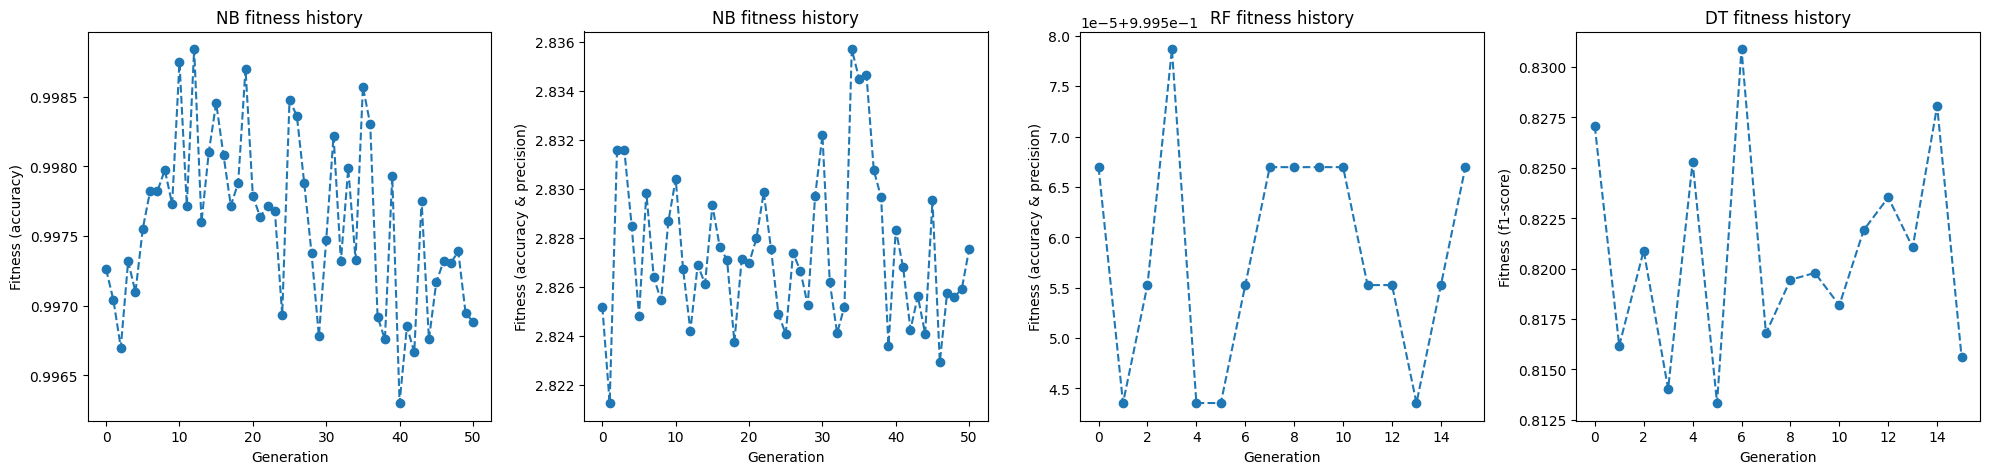

In [21]:
fig, axs = plt.subplots(1, 4, figsize = (20, 5))

axs = axs.flatten()

axs[0].plot(fit_hist_nb_1, "o--")
axs[0].set_title("NB fitness history")
axs[0].set_xlabel("Generation")
axs[0].set_ylabel("Fitness (accuracy)")

axs[1].plot(fit_hist_nb_2, "o--")
axs[1].set_title("NB fitness history")
axs[1].set_xlabel("Generation")
axs[1].set_ylabel("Fitness (accuracy & precision)")

axs[2].plot(fit_hist_rf, "o--")
axs[2].set_title("RF fitness history")
axs[2].set_xlabel("Generation")
axs[2].set_ylabel("Fitness (accuracy & precision)")

axs[3].plot(fit_hist_dt, "o--")
axs[3].set_title("DT fitness history")
axs[3].set_xlabel("Generation")
axs[3].set_ylabel("Fitness (f1-score)")

plt.tight_layout()
plt.show()

In [22]:
import utils.model_evaluation as me

for name in me.feature_vectors.keys():
    print(f"{name}: {me.feature_vectors[name]}")

v1: ['V1', 'V5', 'V7', 'V8', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'Amount']
v2: ['V1', 'V6', 'V13', 'V16', 'V17', 'V22', 'V23', 'V28', 'Amount']
v3: ['V2', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V24', 'V26', 'Amount']
v4: ['V2', 'V7', 'V10', 'V13', 'V15', 'V17', 'V19', 'V28', 'Amount']
v5: ['Time', 'V1', 'V7', 'V8', 'V9', 'V11', 'V12', 'V14', 'V15', 'V22', 'V27', 'V28', 'Amount']
v6: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
v7: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
